In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns

from downstream.signals.signal_r2_permutation_test import process, collect_paths

/Users/romeo/anaconda/envs/aging3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
datatype_loci = {
    "H3K4me1": ["cd14v2_chromhmm18.hg19.8_EnhG2", "cd14v2_chromhmm18.hg19.9_EnhA1"],
    "H3K4me3": ["cd14v2_chromhmm18.hg19.1_TssA", "cd14v2_chromhmm18.hg19.2_TssFlnk"],
    "H3K27ac": ["cd14v2_chromhmm18.hg19.1_TssA", "cd14v2_chromhmm18.hg19.3_TssFlnkU"],
    "H3K36me3": ["cd14v2_chromhmm18.hg19.5_Tx", "cd14v2_chromhmm18.hg19.7_EnhG1",
                 "cd14v2_chromhmm18.hg19.8_EnhG2"],
    "H3K27me3": ["cd14v2_chromhmm18.hg19.14_TssBiv", "cd14v2_chromhmm18.hg19.15_EnhBiv",
                 "cd14v2_chromhmm18.hg19.16_ReprPC"],
    "meth" : ["ucsc_cpgIslandExt.hg19", "cpg_minavcov10_complex_4outliers.narrow.adjusted.regions.filtered"]
}
for dt, loci in datatype_loci.items():
    if dt.startswith("H"):
        loci.append("{}_zinbra_median_consensus".format(dt))
signals_root = Path("/mnt/stripe/bio/experiments/signal_experiments")

In [3]:
folders = [signals_root / dt / loci for dt in sorted(datatype_loci.keys()) for loci in datatype_loci[dt]]
print("Loci folders: ", *[str(p) for p in folders], sep="\n  ")

paths = [p for folder in folders for p in collect_paths(folder)]
print("Paths: ", len(paths))

output_path = signals_root / "validate.norms.permutation_r2.csv"

Loci folders: 
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/cd14v2_chromhmm18.hg19.1_TssA
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/cd14v2_chromhmm18.hg19.3_TssFlnkU
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/H3K27ac_zinbra_median_consensus
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/cd14v2_chromhmm18.hg19.14_TssBiv
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/cd14v2_chromhmm18.hg19.15_EnhBiv
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/cd14v2_chromhmm18.hg19.16_ReprPC
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/H3K27me3_zinbra_median_consensus
  /mnt/stripe/bio/experiments/signal_experiments/H3K36me3/cd14v2_chromhmm18.hg19.5_Tx
  /mnt/stripe/bio/experiments/signal_experiments/H3K36me3/cd14v2_chromhmm18.hg19.7_EnhG1
  /mnt/stripe/bio/experiments/signal_experiments/H3K36me3/cd14v2_chromhmm18.hg19.8_EnhG2
  /mnt/stripe/bio/experiments/signal_experiments/H3K36me3/H3K36me3_zinbra_median_consensus

In [4]:
if not output_path.exists():
    process(paths, str(output_path), seed=100, simulations=16, threads=8)
print("Results file: ", str(output_path))

Results file:  /mnt/stripe/bio/experiments/signal_experiments/validate.norms.permutation_r2.csv


In [5]:
df = pd.DataFrame.from_csv(output_path, index_col=None)
df["loci"] = [Path(f).name for f in df["file"]]
df.head(10)

,modification,file,normalization,mean,median,loci
0,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,frip,0.980701,0.980701,cd14v2_chromhmm18.hg19.1_TssA
1,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,fripm,0.995992,0.995992,cd14v2_chromhmm18.hg19.1_TssA
2,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,fripq,0.997062,0.997062,cd14v2_chromhmm18.hg19.1_TssA
3,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,fripz,0.996705,0.996705,cd14v2_chromhmm18.hg19.1_TssA
4,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,raw,0.982248,0.982248,cd14v2_chromhmm18.hg19.1_TssA
5,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rawq,0.997062,0.997062,cd14v2_chromhmm18.hg19.1_TssA
6,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rawz,0.996705,0.996705,cd14v2_chromhmm18.hg19.1_TssA
7,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rpkm,0.975959,0.975959,cd14v2_chromhmm18.hg19.1_TssA
8,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rpm,0.993791,0.993791,cd14v2_chromhmm18.hg19.1_TssA
9,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,scores,0.993094,0.993094,cd14v2_chromhmm18.hg19.1_TssA


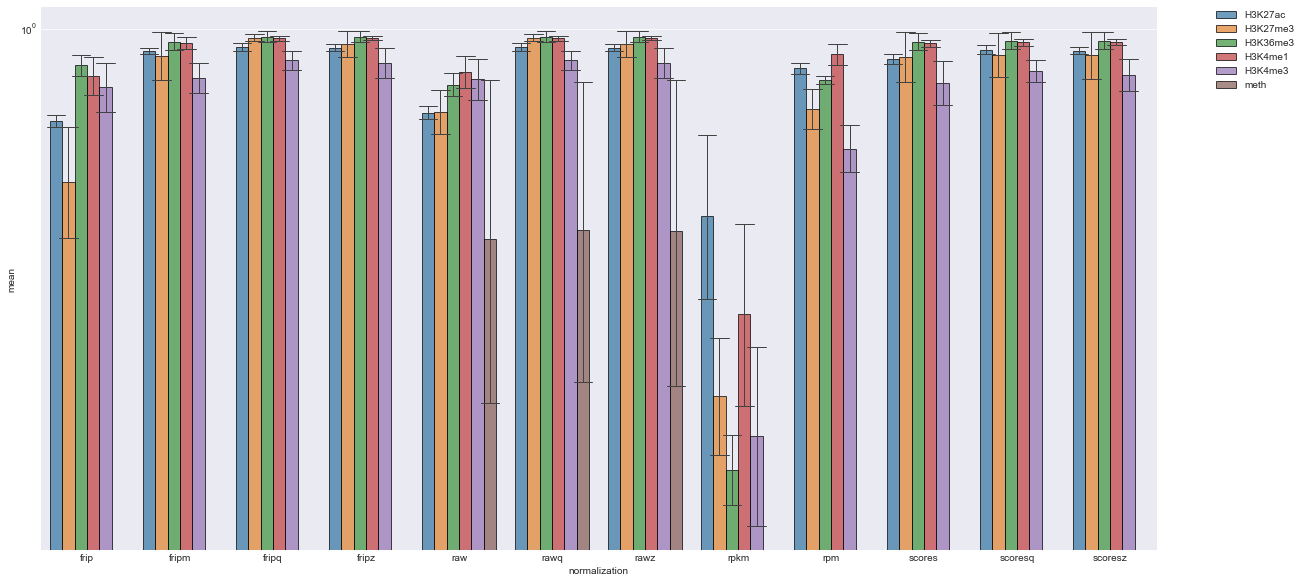

In [6]:
plt.figure(figsize=(20,10))
#g = sns.boxplot(data=df, y="mean", x="modification", hue="normalization")
g = sns.barplot(data=df, y="mean", x="normalization",
                hue="modification", #order=sorted(datatype_loci.keys()),
                ci="sd", capsize=.2, errwidth=1, # error bars
                #color="lightgray", 
                alpha=0.7,
                edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_yscale('log')

plt.show()

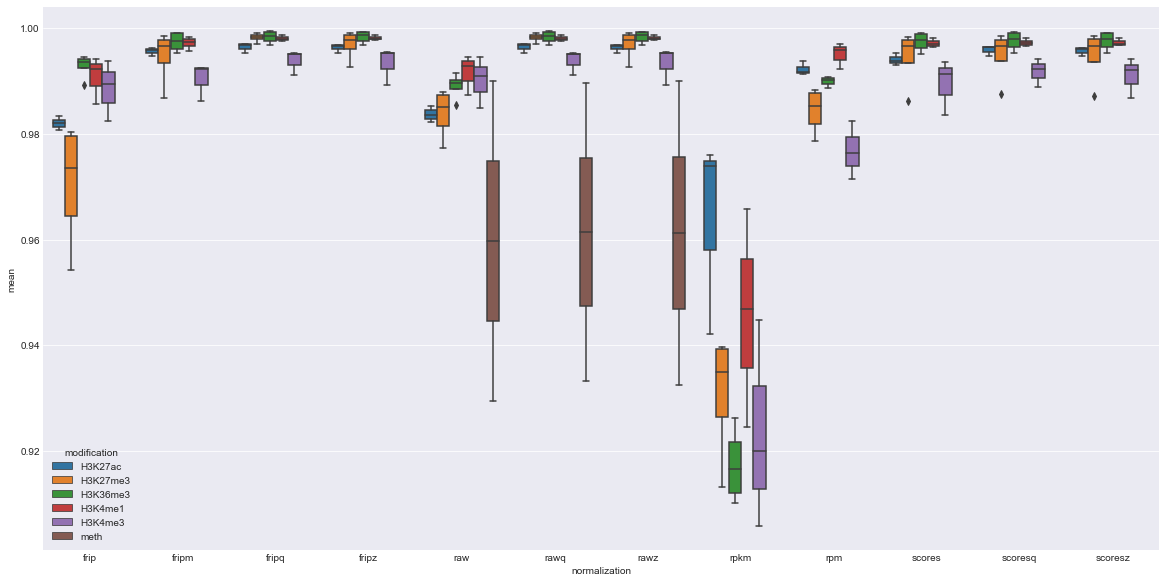

In [7]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df, y="mean", hue="modification", x="normalization")
plt.show()

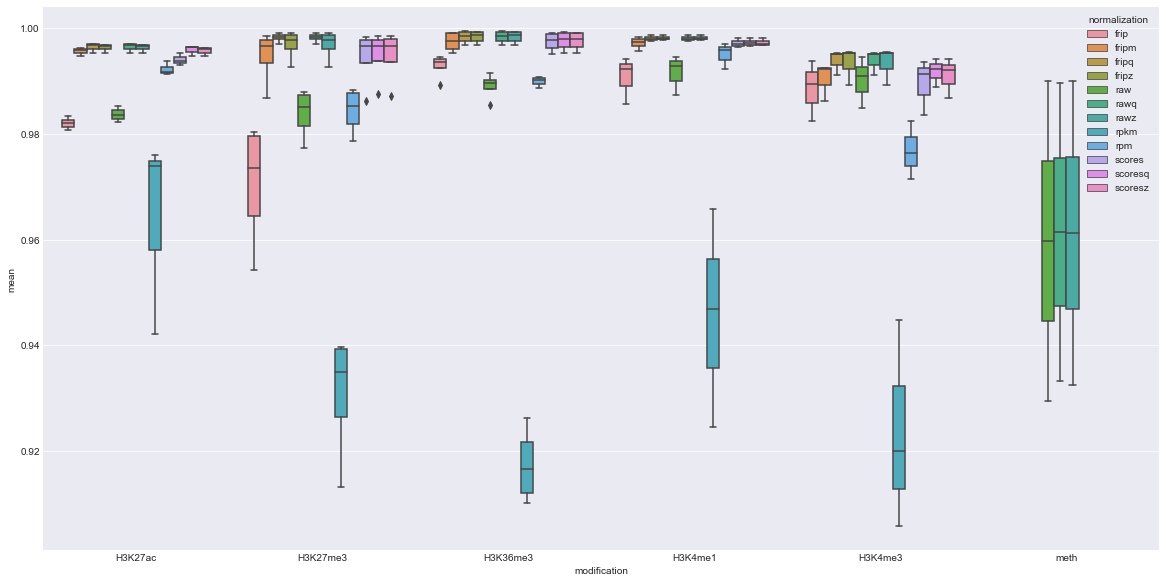

In [8]:
plt.figure(figsize=(20,10))
g = sns.boxplot(data=df, y="mean", x="modification", hue="normalization")
plt.show()